# MODEL

In [187]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, log_loss
from sklearn.ensemble import RandomForestClassifier


import pandas as pd
from sklearn.metrics import mean_squared_error

In [172]:
data22 = pd.read_csv('../data/data_22.csv')

## Data 21

Data set 2.1 clean 

In [137]:
data21 = pd.read_csv('../data/data_21.csv')

In [138]:
data21.columns

Index(['sugar to flour ratio', 'sugar index', 'bake temp', 'chill time',
       'calories', 'density', 'pH', 'grams baking soda', 'bake time',
       'quality', 'butter type', 'weight', 'mixins', 'crunch factor',
       'aesthetic appeal', 'sugar index full', 'bake time full', 'raisins',
       'nuts', 'chocolate', 'peanut', 'oats', 'but_cubed'],
      dtype='object')

In [139]:
data21c = data21[['sugar to flour ratio', 'sugar index', 'bake temp', 'chill time',
       'calories', 'density', 'pH', 'grams baking soda', 'bake time', 'weight', 'crunch factor',
       'aesthetic appeal', 'sugar index full', 'bake time full', 'raisins',
       'nuts', 'chocolate', 'peanut', 'oats', 'but_cubed', 'quality']]

In [140]:
data21 = data21[['sugar to flour ratio', 'bake temp', 'chill time',
       'calories', 'density', 'pH', 'grams baking soda', 'weight', 'crunch factor',
       'aesthetic appeal', 'sugar index full', 'bake time full', 'raisins',
       'nuts', 'chocolate', 'peanut', 'oats', 'but_cubed', 'quality']]

In [141]:
data21c.head()

,sugar to flour ratio,sugar index,bake temp,chill time,calories,density,pH,grams baking soda,bake time,weight,...,aesthetic appeal,sugar index full,bake time full,raisins,nuts,chocolate,peanut,oats,but_cubed,quality
0,0.25,9.5,300,15.0,136.0,0.99367,8.10,0.44,12.1,15.2,...,3,9.5,12.1,1,0,0,0,0,0,8
1,0.23,3.3,520,34.0,113.0,0.99429,8.16,0.48,8.4,12.4,...,3,3.3,8.4,1,0,0,0,0,0,7
2,0.18,1.9,360,33.0,106.0,0.98746,8.21,0.83,14.0,9.4,...,3,1.9,14.0,0,1,1,0,0,0,9
3,0.18,10.5,490,41.0,124.0,0.99630,8.14,0.35,10.5,12.2,...,3,10.5,10.5,0,0,1,0,0,0,7
4,0.24,2.4,770,6.0,33.0,0.99740,8.09,0.57,9.4,19.8,...,3,2.4,9.4,0,1,1,0,1,1,5


In [142]:
X21 = data21c.iloc[:,:-1]
y21 = data21c.iloc[:,-1:]

In [143]:
X21.head()

,sugar to flour ratio,sugar index,bake temp,chill time,calories,density,pH,grams baking soda,bake time,weight,crunch factor,aesthetic appeal,sugar index full,bake time full,raisins,nuts,chocolate,peanut,oats,but_cubed
0,0.25,9.5,300,15.0,136.0,0.99367,8.10,0.44,12.1,15.2,1.30,3,9.5,12.1,1,0,0,0,0,0
1,0.23,3.3,520,34.0,113.0,0.99429,8.16,0.48,8.4,12.4,1.71,3,3.3,8.4,1,0,0,0,0,0
2,0.18,1.9,360,33.0,106.0,0.98746,8.21,0.83,14.0,9.4,1.78,3,1.9,14.0,0,1,1,0,0,0
3,0.18,10.5,490,41.0,124.0,0.99630,8.14,0.35,10.5,12.2,1.59,3,10.5,10.5,0,0,1,0,0,0
4,0.24,2.4,770,6.0,33.0,0.99740,8.09,0.57,9.4,19.8,1.30,3,2.4,9.4,0,1,1,0,1,1


In [144]:
X21_train, X21_test, y21_train, y21_test = train_test_split(X21, y21, test_size=0.2, random_state=10)

In [145]:
X21_train["bake time"] = X21_train["bake time"].fillna(X21_train["bake time"].mean())
X21_test["bake time"] = X21_test["bake time"].fillna(X21_test["bake time"].mean())
X21_train["sugar index"] = X21_train["sugar index"].fillna(X21_train["sugar index"].mean())
X21_test["sugar index"] = X21_test["sugar index"].fillna(X21_test["sugar index"].mean())

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

In [146]:
X21.drop(columns=['sugar index full','bake time full'], inplace=True)

In [147]:
X21.head()

,sugar to flour ratio,sugar index,bake temp,chill time,calories,density,pH,grams baking soda,bake time,weight,crunch factor,aesthetic appeal,raisins,nuts,chocolate,peanut,oats,but_cubed
0,0.25,9.5,300,15.0,136.0,0.99367,8.10,0.44,12.1,15.2,1.30,3,1,0,0,0,0,0
1,0.23,3.3,520,34.0,113.0,0.99429,8.16,0.48,8.4,12.4,1.71,3,1,0,0,0,0,0
2,0.18,1.9,360,33.0,106.0,0.98746,8.21,0.83,14.0,9.4,1.78,3,0,1,1,0,0,0
3,0.18,10.5,490,41.0,124.0,0.99630,8.14,0.35,10.5,12.2,1.59,3,0,0,1,0,0,0
4,0.24,2.4,770,6.0,33.0,0.99740,8.09,0.57,9.4,19.8,1.30,3,0,1,1,0,1,1


In [148]:
extratree = ExtraTreesClassifier(random_state=10, n_estimators=100)

In [149]:
extratree.fit(X21_train, y21_train)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
                     max_depth=None, max_features='auto', max_leaf_nodes=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=10, verbose=0,
                     warm_start=False)

In [150]:
extratree.feature_importances_

array([0.05942678, 0.06101314, 0.06527558, 0.06365409, 0.07224727,
       0.06830704, 0.06057532, 0.06331387, 0.07935467, 0.05949812,
       0.04398428, 0.00011565, 0.06140399, 0.07749009, 0.00870716,
       0.0337195 , 0.01064892, 0.00340921, 0.01676687, 0.09108846])

In [156]:
extratree.score(X21_train, y21_train)

1.0

In [157]:
extratree.score(X21_test, y21_test)

0.6734104046242775

In [158]:
pred=extratree.predict(X21_test)

In [159]:
accuracy = accuracy_score(y21_test,pred)

In [160]:
accuracy

0.6734104046242775

In [161]:
f1 = f1_score(y21_test, pred, average='weighted') 

/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [162]:
f1

0.6683161397810227

In [163]:
cm = confusion_matrix(y21_test, pred)
cm

array([[  0,   0,   1,   1,   0,   0,   0,   0],
       [  0,   0,   4,   0,   0,   0,   0,   0],
       [  0,   0,  94,  24,   1,   1,   0,   0],
       [  0,   1,  19,  76,  22,   5,   0,   0],
       [  0,   0,   4,  13, 161,  79,   1,   0],
       [  0,   0,   0,   1,  59, 287,  27,   0],
       [  0,   0,   0,   0,   1,  56,  71,   2],
       [  0,   0,   0,   0,   0,   7,  10,  10]])

### Cross Validated

In [105]:
X21 = data21.iloc[:,:-1]
y21 = data21.iloc[:,-1:]

In [106]:
X21_train, X21_test, y21_train, y21_test = train_test_split(X21, y21, test_size=0.2, random_state=10)

In [107]:
X21.head()

,sugar to flour ratio,bake temp,chill time,calories,density,pH,grams baking soda,weight,crunch factor,aesthetic appeal,sugar index full,bake time full,raisins,nuts,chocolate,peanut,oats,but_cubed
0,0.25,300,15.0,136.0,0.99367,8.10,0.44,15.2,1.30,3,9.5,12.1,1,0,0,0,0,0
1,0.23,520,34.0,113.0,0.99429,8.16,0.48,12.4,1.71,3,3.3,8.4,1,0,0,0,0,0
2,0.18,360,33.0,106.0,0.98746,8.21,0.83,9.4,1.78,3,1.9,14.0,0,1,1,0,0,0
3,0.18,490,41.0,124.0,0.99630,8.14,0.35,12.2,1.59,3,10.5,10.5,0,0,1,0,0,0
4,0.24,770,6.0,33.0,0.99740,8.09,0.57,19.8,1.30,3,2.4,9.4,0,1,1,0,1,1


In [108]:
extratree = ExtraTreesClassifier()

In [109]:
param_grid = { 
    'n_estimators': [10, 50, 100],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [3,5,7,9],
    'criterion' :['gini', 'entropy'],
}

In [110]:
CV_extratree = GridSearchCV(estimator=extratree, param_grid=param_grid, cv= 5)
CV_extratree.fit(X21_train, y21_train)

/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 

/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 

/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 

/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 

/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 

/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 

/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 

/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 

/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 

/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 

/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 

/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 

/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=ExtraTreesClassifier(bootstrap=False, class_weight=None,
                                            criterion='gini', max_depth=None,
                                            max_features='auto',
                                            max_leaf_nodes=None,
                                            min_impurity_decrease=0.0,
                                            min_impurity_split=None,
                                            min_samples_leaf=1,
                                            min_samples_split=2,
                                            min_weight_fraction_leaf=0.0,
                                            n_estimators='warn', n_jobs=None,
                                            oob_score=False, random_state=None,
                                            verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini', 

In [111]:
CV_extratree.best_params_

{'criterion': 'entropy',
 'max_depth': 9,
 'max_features': 'sqrt',
 'n_estimators': 100}

In [112]:
extratree_best = ExtraTreesClassifier(random_state=10, max_features=CV_extratree.best_params_['max_features'], n_estimators=CV_extratree.best_params_['n_estimators'], max_depth=CV_extratree.best_params_['max_depth'], criterion=CV_extratree.best_params_['criterion'])


In [113]:
extratree_best.fit(X21_train, y21_train)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='entropy',
                     max_depth=9, max_features='sqrt', max_leaf_nodes=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=10, verbose=0,
                     warm_start=False)

In [114]:
extratree_best.feature_importances_

array([2.32912582e-02, 3.29798456e-02, 3.60962965e-02, 7.11002664e-02,
       5.95067628e-02, 2.37893086e-02, 2.78458006e-02, 2.87292396e-02,
       1.20593408e-02, 3.28101708e-05, 4.14366784e-02, 1.04899470e-01,
       1.67524068e-02, 9.90605091e-02, 2.03113512e-02, 1.19618432e-02,
       2.68551058e-02, 3.63291706e-01])

In [115]:
def plot_feat_imp(model, number,predictors):
   feat_imp = pd.Series(model.feature_importances_).sort_values(ascending=False)
   feat_imp = feat_imp[0:number]
   name = []
   for i in feat_imp.index.tolist():
       name.append(predictors[i])
   feat_imp.plot(kind='bar', title='Feature Importances')
   plt.xticks(range(0, len(feat_imp)),name, rotation='vertical')
   plt.ylabel('Feature Importance Score')
   display(plt.show())

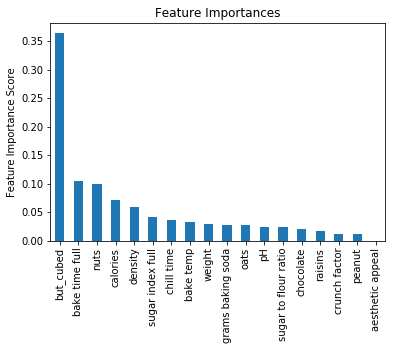

None

In [116]:
plot_feat_imp(extratree_best,23,data21.columns)

In [117]:
extratree_best.score(X21_train, y21_train)

0.6550976138828634

In [118]:
extratree_best.score(X21_test, y21_test)

0.5963391136801541

In [119]:
pred=extratree_best.predict(X21_test)

In [120]:
accuracy = accuracy_score(y21_test,pred)

In [121]:
accuracy

0.5963391136801541

In [122]:
f1 = f1_score(y21_test, pred, average='weighted') 

/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [123]:
f1

0.5622390155265311

In [124]:
cm = confusion_matrix(y21_test, pred)
cm

array([[  0,   0,   1,   1,   0,   0,   0,   0],
       [  0,   0,   2,   2,   0,   0,   0,   0],
       [  0,   0,  98,  21,   0,   1,   0,   0],
       [  0,   0,  28,  68,  17,  10,   0,   0],
       [  0,   0,   4,  16, 107, 131,   0,   0],
       [  0,   0,   0,   0,  48, 320,   6,   0],
       [  0,   0,   0,   0,   2, 103,  25,   0],
       [  0,   0,   0,   0,   0,  21,   5,   1]])

## Predict binary Manufacture - No Manufacture

In [202]:
data3 = pd.read_csv('../data/data_3.csv')

In [203]:
data3.columns

Index(['sugar to flour ratio', 'sugar index', 'bake temp', 'chill time',
       'calories', 'density', 'pH', 'grams baking soda', 'bake time',
       'quality', 'butter type', 'weight', 'mixins', 'crunch factor',
       'aesthetic appeal', 'sugar index full', 'bake time full', 'raisins',
       'nuts', 'chocolate', 'peanut', 'oats', 'manufacture'],
      dtype='object')

Selecting the columns

In [213]:
data31 = data3[['sugar to flour ratio', 'chill time',
       'calories', 'density', 'pH', 'grams baking soda', 'bake temp',
        'weight', 'crunch factor',
       'aesthetic appeal', 'sugar index full', 'bake time full', 'raisins',
       'nuts', 'chocolate', 'peanut', 'oats', 'manufacture']]

In [214]:
data31.head()

,sugar to flour ratio,chill time,calories,density,pH,grams baking soda,bake temp,weight,crunch factor,aesthetic appeal,sugar index full,bake time full,raisins,nuts,chocolate,peanut,oats,manufacture
0,0.25,15.0,136.0,0.99367,8.10,0.44,300,15.2,1.30,3,9.5,12.1,1,0,0,0,0,1
1,0.23,34.0,113.0,0.99429,8.16,0.48,520,12.4,1.71,3,3.3,8.4,1,0,0,0,0,0
2,0.18,33.0,106.0,0.98746,8.21,0.83,360,9.4,1.78,3,1.9,14.0,0,1,1,0,0,1
3,0.18,41.0,124.0,0.99630,8.14,0.35,490,12.2,1.59,3,10.5,10.5,0,0,1,0,0,0
4,0.24,6.0,33.0,0.99740,8.09,0.57,770,19.8,1.30,3,2.4,9.4,0,1,1,0,1,0


In [215]:
data31.isnull().sum()

sugar to flour ratio    0
chill time              0
calories                0
density                 0
pH                      0
grams baking soda       0
bake temp               0
weight                  0
crunch factor           0
aesthetic appeal        0
sugar index full        0
bake time full          0
raisins                 0
nuts                    0
chocolate               0
peanut                  0
oats                    0
manufacture             0
dtype: int64

In [216]:
X31 = data31.iloc[:,:-1]
y31 = data31.iloc[:,-1:]

In [217]:
X31_train, X31_test, y31_train, y31_test = train_test_split(X31, y31, test_size=0.2, random_state=10)

In [218]:
rfc = RandomForestClassifier(random_state=10)


In [327]:
#First
param_grid = { 
    'n_estimators': [10, 50, 110],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [3,5,7,9],
    'criterion' :['gini', 'entropy'],
}

#Seccond
param_grid = { 
    'n_estimators': [100, 150, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [9,11,13],
    'criterion' :['gini', 'entropy'],
}
#Third
param_grid = { 
    'n_estimators': [90, 100, 110],
    'max_features': ['auto'],
    'max_depth' : [9,11],
    'criterion' :['gini'],
}
#Fourth
param_grid = { 
    'n_estimators': [80, 90, 100],
    'max_features': ['auto'],
    'max_depth' : [7],
    'criterion' :['gini'],
}

In [328]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X31_train, y31_train)

/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=10,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'

In [329]:
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'max_features': 'auto',
 'n_estimators': 90}

In [330]:
rfc_best=RandomForestClassifier(random_state=10, max_features=CV_rfc.best_params_['max_features'], n_estimators=CV_rfc.best_params_['n_estimators'], max_depth=CV_rfc.best_params_['max_depth'], criterion=CV_rfc.best_params_['criterion'])


In [331]:
rfc_best.fit(X31_train, y31_train)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=7, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=90,
                       n_jobs=None, oob_score=False, random_state=10, verbose=0,
                       warm_start=False)

In [332]:
rfc_best.feature_importances_

array([0.05947083, 0.07946354, 0.16189449, 0.12824129, 0.01926206,
       0.02393626, 0.22527495, 0.03498867, 0.0108235 , 0.        ,
       0.04875732, 0.09742786, 0.0104107 , 0.07070051, 0.01609086,
       0.00045308, 0.01280408])

In [333]:
def plot_feat_imp(model, number,predictors):
   feat_imp = pd.Series(model.feature_importances_).sort_values(ascending=False)
   feat_imp = feat_imp[0:number]
   name = []
   for i in feat_imp.index.tolist():
       name.append(predictors[i])
   feat_imp.plot(kind='bar', title='Feature Importances')
   plt.xticks(range(0, len(feat_imp)),name, rotation='vertical')
   plt.ylabel('Feature Importance Score')
   #plt.savefig('RF_AgeBins_FI')
   display(plt.show())

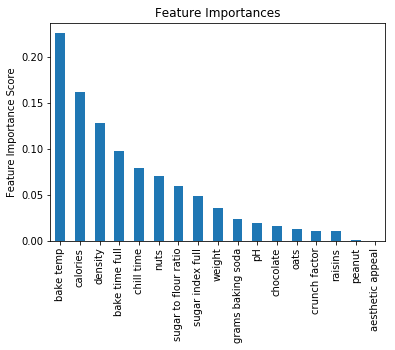

None

In [334]:
plot_feat_imp(rfc_best,27,data31.columns)

In [335]:
rfc_best.score(X31_train, y31_train)

0.8585201253314052

In [336]:
rfc_best.score(X31_test, y31_test)

0.8159922928709056

In [337]:
pred=rfc_best.predict(X31_test)

In [338]:
accuracy = accuracy_score(y31_test,pred)
f1 = f1_score(y31_test, pred) 

In [339]:
accuracy

0.8159922928709056

In [340]:
f1

0.8343451864700782

In [341]:
cm = confusion_matrix(y31_test, pred)
cm

array([[366, 141],
       [ 50, 481]])

## STANDARIZE

In [202]:
data3 = pd.read_csv('../data/data_3.csv')

In [203]:
data3.columns

Index(['sugar to flour ratio', 'sugar index', 'bake temp', 'chill time',
       'calories', 'density', 'pH', 'grams baking soda', 'bake time',
       'quality', 'butter type', 'weight', 'mixins', 'crunch factor',
       'aesthetic appeal', 'sugar index full', 'bake time full', 'raisins',
       'nuts', 'chocolate', 'peanut', 'oats', 'manufacture'],
      dtype='object')

Selecting the columns

In [213]:
data31 = data3[['sugar to flour ratio', 'chill time',
       'calories', 'density', 'pH', 'grams baking soda', 'bake temp',
        'weight', 'crunch factor',
       'aesthetic appeal', 'sugar index full', 'bake time full', 'raisins',
       'nuts', 'chocolate', 'peanut', 'oats', 'manufacture']]

In [214]:
data31.head()

,sugar to flour ratio,chill time,calories,density,pH,grams baking soda,bake temp,weight,crunch factor,aesthetic appeal,sugar index full,bake time full,raisins,nuts,chocolate,peanut,oats,manufacture
0,0.25,15.0,136.0,0.99367,8.10,0.44,300,15.2,1.30,3,9.5,12.1,1,0,0,0,0,1
1,0.23,34.0,113.0,0.99429,8.16,0.48,520,12.4,1.71,3,3.3,8.4,1,0,0,0,0,0
2,0.18,33.0,106.0,0.98746,8.21,0.83,360,9.4,1.78,3,1.9,14.0,0,1,1,0,0,1
3,0.18,41.0,124.0,0.99630,8.14,0.35,490,12.2,1.59,3,10.5,10.5,0,0,1,0,0,0
4,0.24,6.0,33.0,0.99740,8.09,0.57,770,19.8,1.30,3,2.4,9.4,0,1,1,0,1,0


In [215]:
data31.isnull().sum()

sugar to flour ratio    0
chill time              0
calories                0
density                 0
pH                      0
grams baking soda       0
bake temp               0
weight                  0
crunch factor           0
aesthetic appeal        0
sugar index full        0
bake time full          0
raisins                 0
nuts                    0
chocolate               0
peanut                  0
oats                    0
manufacture             0
dtype: int64

In [216]:
X31 = data31.iloc[:,:-1]
y31 = data31.iloc[:,-1:]

In [217]:
X31_train, X31_test, y31_train, y31_test = train_test_split(X31, y31, test_size=0.2, random_state=10)

In [343]:
from sklearn.preprocessing import StandardScaler

# Define the scaler 
scaler = StandardScaler().fit(X31_train)

# Scale the train set
X31_train = scaler.transform(X31_train)

# Scale the test set
X31_test = scaler.transform(X31_test)

In [344]:
rfc = RandomForestClassifier(random_state=10)


In [360]:
#First
param_grid = { 
    'n_estimators': [10, 50, 110],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [3,5,7,9],
    'criterion' :['gini', 'entropy'],
}

#Seccond
param_grid = { 
    'n_estimators': [100, 150, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [9,11,13],
    'criterion' :['gini', 'entropy'],
}
#Third
param_grid = { 
    'n_estimators': [90, 100, 110],
    'max_features': ['auto'],
    'max_depth' : [9,11],
    'criterion' :['gini'],
}
#Fourth
param_grid = { 
    'n_estimators': [80, 90, 100],
    'max_features': ['auto'],
    'max_depth' : [7,8,9],
    'criterion' :['gini'],
}

In [361]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X31_train, y31_train)

/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 

/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=10,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'

In [362]:
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 9,
 'max_features': 'auto',
 'n_estimators': 80}

In [363]:
rfc_best=RandomForestClassifier(random_state=10, max_features=CV_rfc.best_params_['max_features'], n_estimators=CV_rfc.best_params_['n_estimators'], max_depth=CV_rfc.best_params_['max_depth'], criterion=CV_rfc.best_params_['criterion'])


In [364]:
rfc_best.fit(X31_train, y31_train)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=9, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=80,
                       n_jobs=None, oob_score=False, random_state=10, verbose=0,
                       warm_start=False)

In [365]:
rfc_best.feature_importances_

array([5.93097712e-02, 8.48571615e-02, 1.42073504e-01, 1.31794675e-01,
       3.00427779e-02, 2.85784913e-02, 2.07252797e-01, 4.10577691e-02,
       2.15773180e-02, 1.81137344e-05, 6.55981074e-02, 8.80055305e-02,
       1.35884979e-02, 6.01638241e-02, 1.26622809e-02, 9.69249634e-04,
       1.24501313e-02])

In [366]:
def plot_feat_imp(model, number,predictors):
   feat_imp = pd.Series(model.feature_importances_).sort_values(ascending=False)
   feat_imp = feat_imp[0:number]
   name = []
   for i in feat_imp.index.tolist():
       name.append(predictors[i])
   feat_imp.plot(kind='bar', title='Feature Importances')
   plt.xticks(range(0, len(feat_imp)),name, rotation='vertical')
   plt.ylabel('Feature Importance Score')
   #plt.savefig('RF_AgeBins_FI')
   display(plt.show())

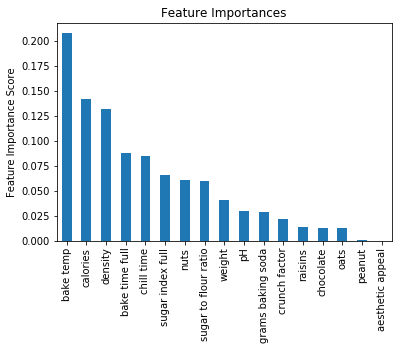

None

In [367]:
plot_feat_imp(rfc_best,27,data31.columns)

In [368]:
rfc_best.score(X31_train, y31_train)

0.9074475777295734

In [369]:
rfc_best.score(X31_test, y31_test)

0.8323699421965318

In [370]:
pred=rfc_best.predict(X31_test)

In [371]:
accuracy = accuracy_score(y31_test,pred)
f1 = f1_score(y31_test, pred) 

In [372]:
accuracy

0.8323699421965318

In [373]:
f1

0.8443649373881932

In [374]:
cm = confusion_matrix(y31_test, pred)
cm

array([[392, 115],
       [ 59, 472]])